In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.interpolate import make_interp_spline


In [11]:

# Set seed for reproducibility
np.random.seed(42)

# Create a DataFrame with columns "program" and "subprogram"
data = {
    "program": np.random.choice(["program1", "program2", "program3"], size=100),
    "subprogram": np.random.choice([f"subprogram{i}" for i in range(1, 9)], size=100)
}

# Add columns 2020-2069 with random Gaussian values rounded to integers between 0 and 100
for year in range(2020, 2070):
    data[f"year_{year}"] = np.round(np.random.normal(loc=50, scale=25, size=100)).astype(int)
    data[f"year_{year}"] = np.clip(data[f"year_{year}"], 0, 100)  # Clip values to be within [0, 100]

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame

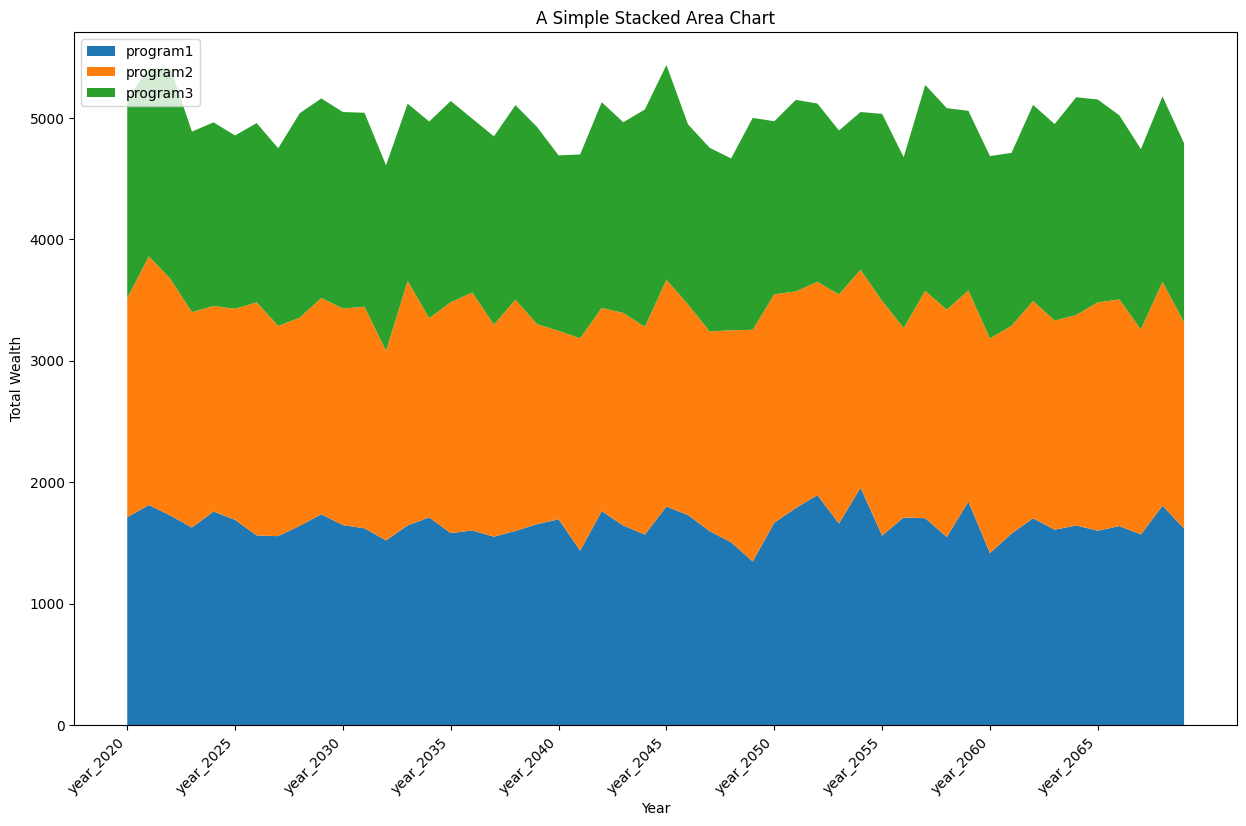

In [32]:
grouped_df = df.groupby("program").sum()[df.columns[2:]].T

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(15, 9))  # Set the figure size
plt.stackplot(range(len(grouped_df.index)),
              grouped_df.values.T,
              labels=grouped_df.columns)

# Set x-axis ticks at every other 5 ticks
x_ticks = list(range(0, len(grouped_df.index), 5))

# Set x-axis labels to the corresponding index labels
plt.xticks(x_ticks, grouped_df.index[x_ticks], rotation=45, ha="right")

plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Total Wealth') # Add a label for the y-axis
plt.title('A Simple Stacked Area Chart') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

In [35]:
grouped_df.head(3)

program,program1,program2,program3
year_2020,1711,1804,1642
year_2021,1811,2048,1544
year_2022,1725,1949,1735


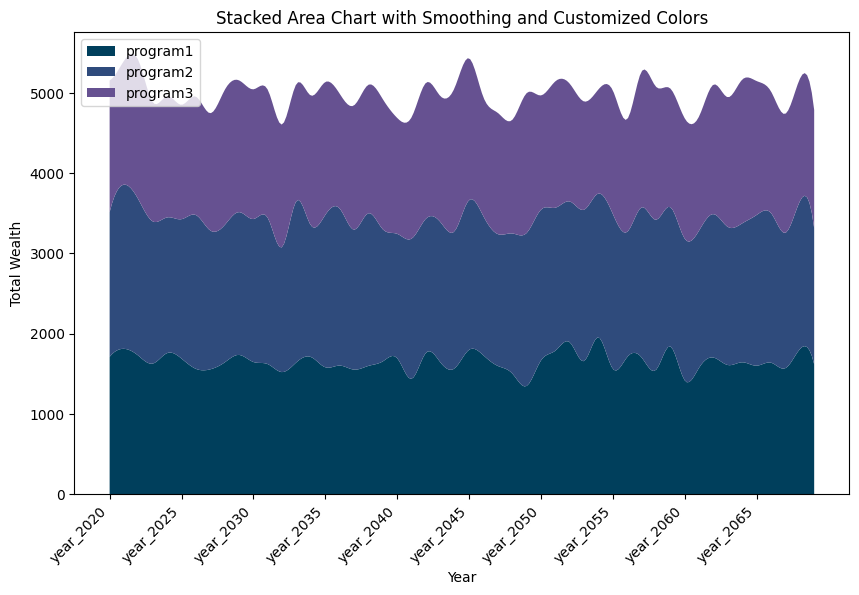

In [52]:
# Define custom colors for the countries
custom_colors = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]

# Smooth the lines using spline interpolation
x_smooth = np.linspace(0, len(grouped_df.index)-1, 300)

pivot_smooth = pd.DataFrame({program: make_interp_spline(list(range(len(grouped_df.index))), grouped_df[program])(x_smooth)
                             for program in grouped_df.columns})

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(10, 6))  # Set the figure size
plt.stackplot(x_smooth,
              pivot_smooth.values.T,
              labels=pivot_smooth.columns,
              colors=custom_colors)

# Set x-axis ticks at every other 5 ticks
x_ticks = list(range(0, len(grouped_df.index), 5))

# Set x-axis labels to the corresponding index labels
plt.xticks(x_ticks, grouped_df.index[x_ticks], rotation=45, ha="right")
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Total Wealth') # Add a label for the y-axis
plt.title('Stacked Area Chart with Smoothing and Customized Colors') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

In [89]:
def add_label(x, y, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"{int(y)} \n {str(int(x))[2:]}", 
        xy=(x, y - PAD), 
        ha="center", 
        va="bottom",
        fontsize=fontsize,
        zorder=12
    )

In [90]:
subdf = df[df["program"] == "program1"].groupby(["program","subprogram"]).sum().reset_index()[df.columns[1:]].set_index("subprogram").T
subdf.head()

subprogram,subprogram1,subprogram2,subprogram3,subprogram4,subprogram5,subprogram6,subprogram7,subprogram8
year_2020,45,264,239,343,215,157,266,182
year_2021,10,313,217,267,281,243,267,213
year_2022,52,269,268,339,165,194,306,132
year_2023,45,215,228,290,275,192,276,105
year_2024,53,374,148,396,229,150,277,131


In [112]:
def plot_programs(subdf,program,ax,subprogram="subprogram2"):
    for col in subdf.columns:
        vals = subdf[col].values
        index = range(len(subdf.index))
        if col == subprogram:
            ax.plot(index, vals, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(index, vals, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
            # Pass the first and last values to the add_label function
            add_label(index[0], vals[0], 16, ax)
            add_label(index[-1], vals[-1], 16,ax)
        else:
            ax.plot(index, vals, color="#BFBFBF", lw=1.5)
    
    ax.set_yticks([])
    
    # Set x-axis ticks at every other 5 ticks
    x_ticks = list(range(0, len(subdf.index), 3))
    
    # Set x-axis labels to the corresponding index labels
    plt.xticks(x_ticks, subdf.index[x_ticks], rotation=45, ha="right")
    ax.tick_params(bottom=False)
    
    ax.set_title(program, fontsize=24, fontweight=500)
    return ax

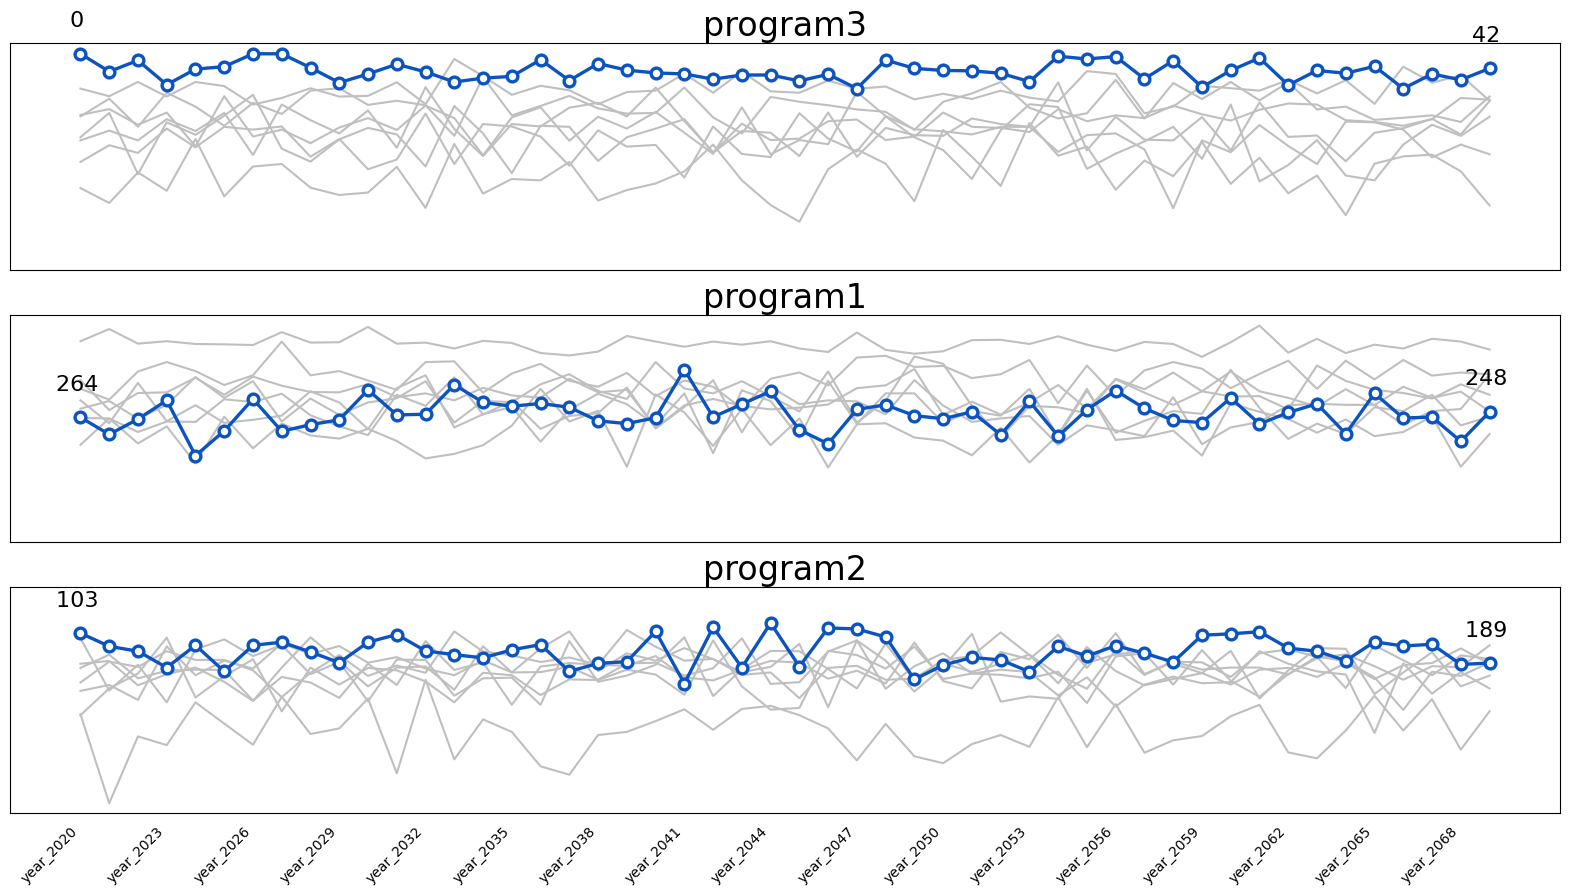

In [113]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True, figsize=(20, 10))

for ax,program in zip(axes.ravel(),df["program"].unique().tolist()):
    new_df = df[df["program"] == program].groupby(["program","subprogram"]).sum().reset_index()[df.columns[1:]].set_index("subprogram").T
    plot_programs(new_df,program,ax)
ax.invert_yaxis()